# Mean Reversion -  (Pairs Trading)
- Long Pair: Long stock A and short stock B
- Short Pair: Short stock A and long stock B
- You want to find a high correlation between stock A and B's price (usually > 0.8) --  in this case let's say 0.9. If you find a relationship suggesting that the prices move in opposite directions, you can capitalize on this behavior. ONCE the assets deviate from their typical correlation, say 0.5, you can long/short the pair since you expect the correlation to converge back to its original form.
- Sort of becomes an art when you try to maximize the spread between the assets

![image info](SP.png)

# Basic Idea
- 1) Find 2 assets that move similarly with eachother (whether it be a negative or positive correlation)
- 2) Sell the 'overvalued' stock and buy the 'undervalued' stock
-- A common signal to use to triger the purchase of a pair trade is to use the Price Ratio (Stock A / Stock B). If the ratio changes significantly, then you know it is time to trade. 'Significance' can be measured with standard deviation.

# (Link in the descriptions)
![image info](./Monte_Pic.png)

In [1]:
# Getting Data from 6 years back
# I will use the most recent 1 year to determine how well I would have done if I follow the efficient frontier.
# The market is open 252 times in a given year.
# I will get the adjusted close as my main data.
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime

def get_historical_Data(tickers):
    """This function returns a pd dataframe with all of the adjusted closing information"""
    data = pd.DataFrame()
    names = list()
    for i in tickers:
        data = pd.concat([data,pdr.get_data_yahoo(symbols=i, start=datetime(2020, 4, 24), end=datetime(2021, 4, 24)).iloc[:,5]], axis = 1)
        names.append(i)
    data.columns = names
    return data

ticks = ["DPZ", "AAPL", "GOOG", "AMD", "GME", "SPY", "NFLX", "BA", "WMT","TWTR","GS","XOM","NKE","FEYE", "FB","BRK-B", "MSFT"] #Name of company (Dominos pizza)
d = get_historical_Data(ticks)
print(d.shape)
# Most Recent Data
d.tail()

(252, 17)


,DPZ,AAPL,GOOG,AMD,GME,SPY,NFLX,BA,WMT,TWTR,GS,XOM,NKE,FEYE,FB,BRK-B,MSFT
2021-04-19 00:00:00,397.959991,134.839996,2302.399902,81.110001,164.369995,415.209991,554.440002,244.149994,139.710007,67.940002,343.089996,56.480000,132.570007,20.165001,302.239990,270.279999,258.739990
2021-04-20 00:00:00,398.049988,133.110001,2293.629883,79.269997,158.529999,412.170013,549.570007,234.059998,140.789993,65.699997,331.880005,55.290001,127.110001,19.900000,302.649994,267.890015,258.260010
2021-04-21 00:00:00,394.799988,133.500000,2293.290039,81.610001,158.509995,416.070007,508.899994,235.919998,141.199997,67.330002,335.269989,56.000000,129.899994,19.990000,301.470001,272.209991,260.579987
2021-04-22 00:00:00,398.760010,131.940002,2267.919922,79.059998,151.169998,412.269989,508.779999,234.330002,139.669998,64.309998,330.850006,55.270000,129.179993,20.110001,296.519989,269.510010,257.170013
2021-04-23 00:00:00,397.709991,134.320007,2315.300049,82.760002,151.179993,416.739990,505.549988,238.380005,139.899994,67.019997,339.350006,55.570000,130.190002,20.280001,301.130005,271.980011,261.149994


In [2]:
corr_matrix = d.corr()
corr_matrix

,DPZ,AAPL,GOOG,AMD,GME,SPY,NFLX,BA,WMT,TWTR,GS,XOM,NKE,FEYE,FB,BRK-B,MSFT
DPZ,1.000000,0.215169,-0.207343,0.265336,-0.363020,-0.043568,0.189883,-0.195480,0.335647,-0.178380,-0.339183,-0.553837,0.024097,-0.182168,0.306881,-0.072372,0.049852
AAPL,0.215169,1.000000,0.765563,0.918794,0.449900,0.897570,0.861139,0.649297,0.798448,0.759015,0.673259,0.250475,0.889708,0.786079,0.860028,0.840687,0.868948
GOOG,-0.207343,0.765563,1.000000,0.585081,0.743687,0.950758,0.715588,0.844313,0.497455,0.924865,0.933780,0.720093,0.775796,0.816079,0.737040,0.925402,0.925449
AMD,0.265336,0.918794,0.585081,1.000000,0.243387,0.760382,0.736988,0.492571,0.864122,0.624265,0.488650,0.053716,0.849127,0.660146,0.755683,0.725688,0.672401
GME,-0.363020,0.449900,0.743687,0.243387,1.000000,0.679288,0.428684,0.663475,0.116061,0.704470,0.801194,0.746583,0.479506,0.622224,0.438879,0.704577,0.672505
SPY,-0.043568,0.897570,0.950758,0.760382,0.679288,1.000000,0.792810,0.860000,0.652183,0.916591,0.906785,0.594242,0.890021,0.867217,0.823235,0.968449,0.939998
NFLX,0.189883,0.861139,0.715588,0.736988,0.428684,0.792810,1.000000,0.563172,0.635886,0.724582,0.628058,0.275218,0.721957,0.680743,0.742170,0.700613,0.859247
BA,-0.195480,0.649297,0.844313,0.492571,0.663475,0.860000,0.563172,1.000000,0.381063,0.792784,0.872979,0.732941,0.717081,0.732905,0.644235,0.824197,0.766547
WMT,0.335647,0.798448,0.497455,0.864122,0.116061,0.652183,0.635886,0.381063,1.000000,0.475323,0.339739,-0.137751,0.795766,0.495113,0.706721,0.620749,0.555514
TWTR,-0.178380,0.759015,0.924865,0.624265,0.704470,0.916591,0.724582,0.792784,0.475323,1.000000,0.907607,0.659845,0.822042,0.792185,0.690320,0.907169,0.877524


<AxesSubplot:>

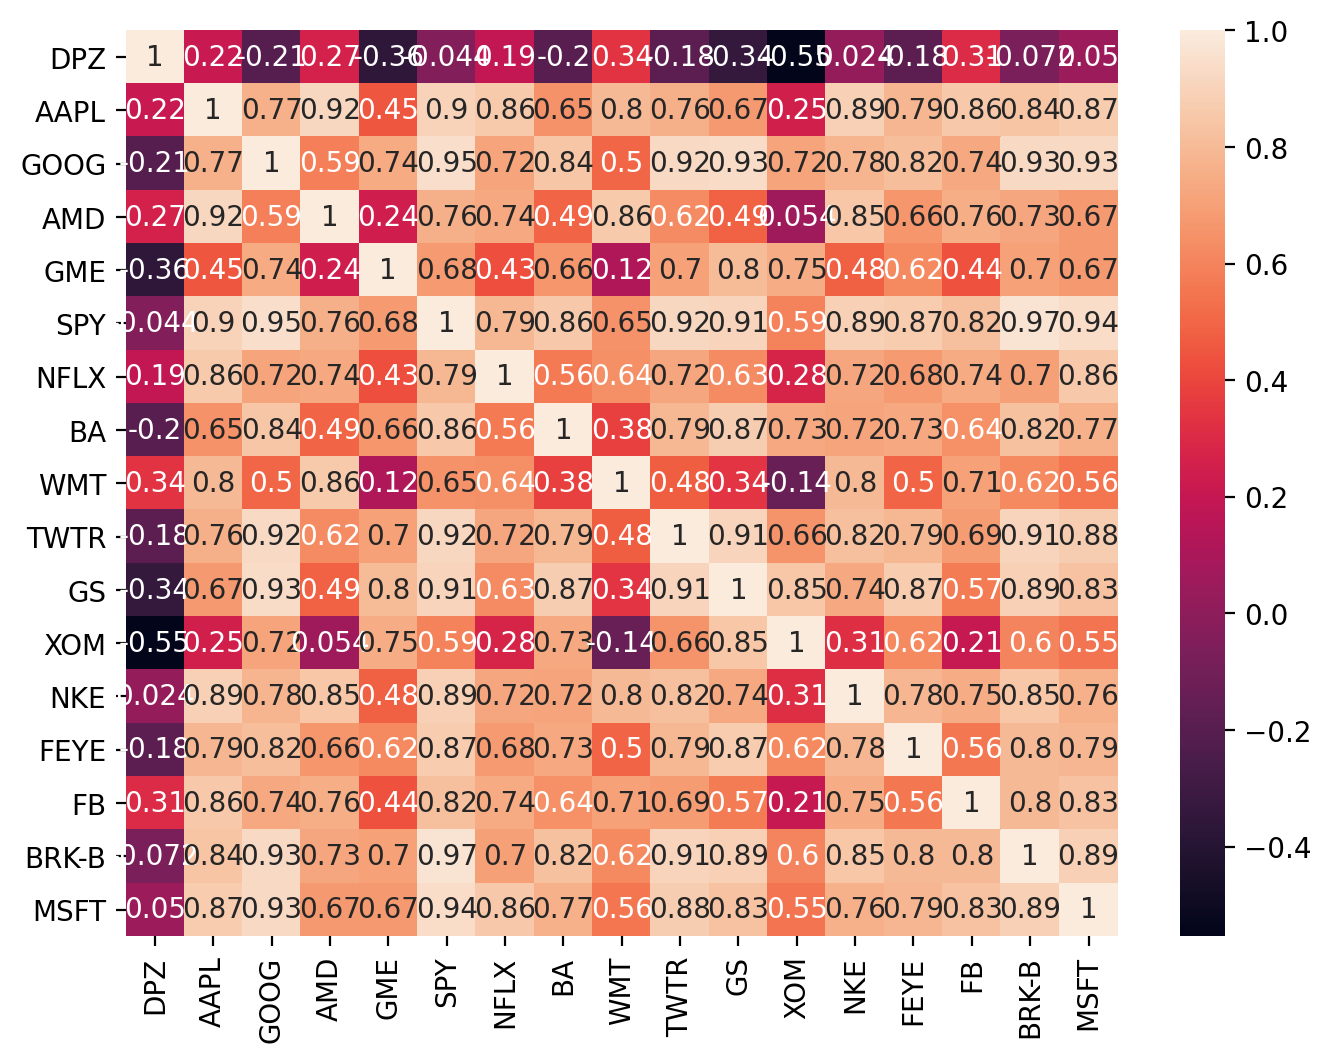

In [3]:
# Let's heatmap this matrix so that we can have a better sense of what is going on
import seaborn as sn
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=200)
sn.heatmap(corr_matrix, annot = True)

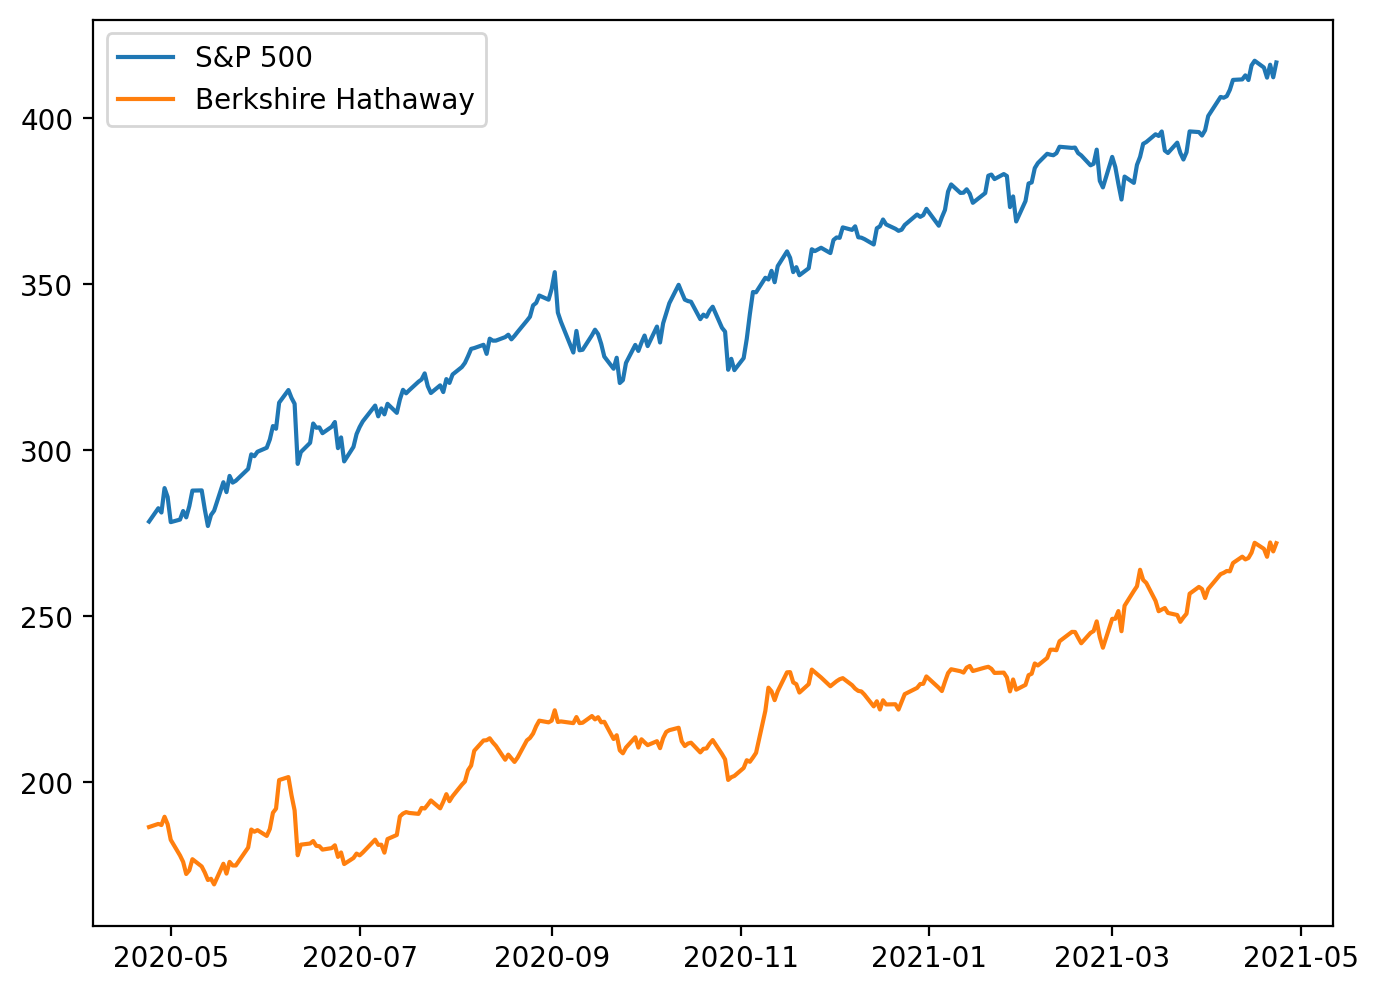

In [4]:
import matplotlib.pyplot as plt
figure(figsize=(8, 6), dpi=200)
SPY = d['SPY'] # S&P 500
BRK_A = d['BRK-B'] # Berkshire Class A share
# HOWEVER, let's check out the relationship between the stocks...
plt.plot(SPY, label = "S&P 500")
plt.plot(BRK_A, label = "Berkshire Hathaway")
plt.legend()
# oh... that's why the correlation seem very high. The data are not 'standardized.'
# Let's look at a different one...

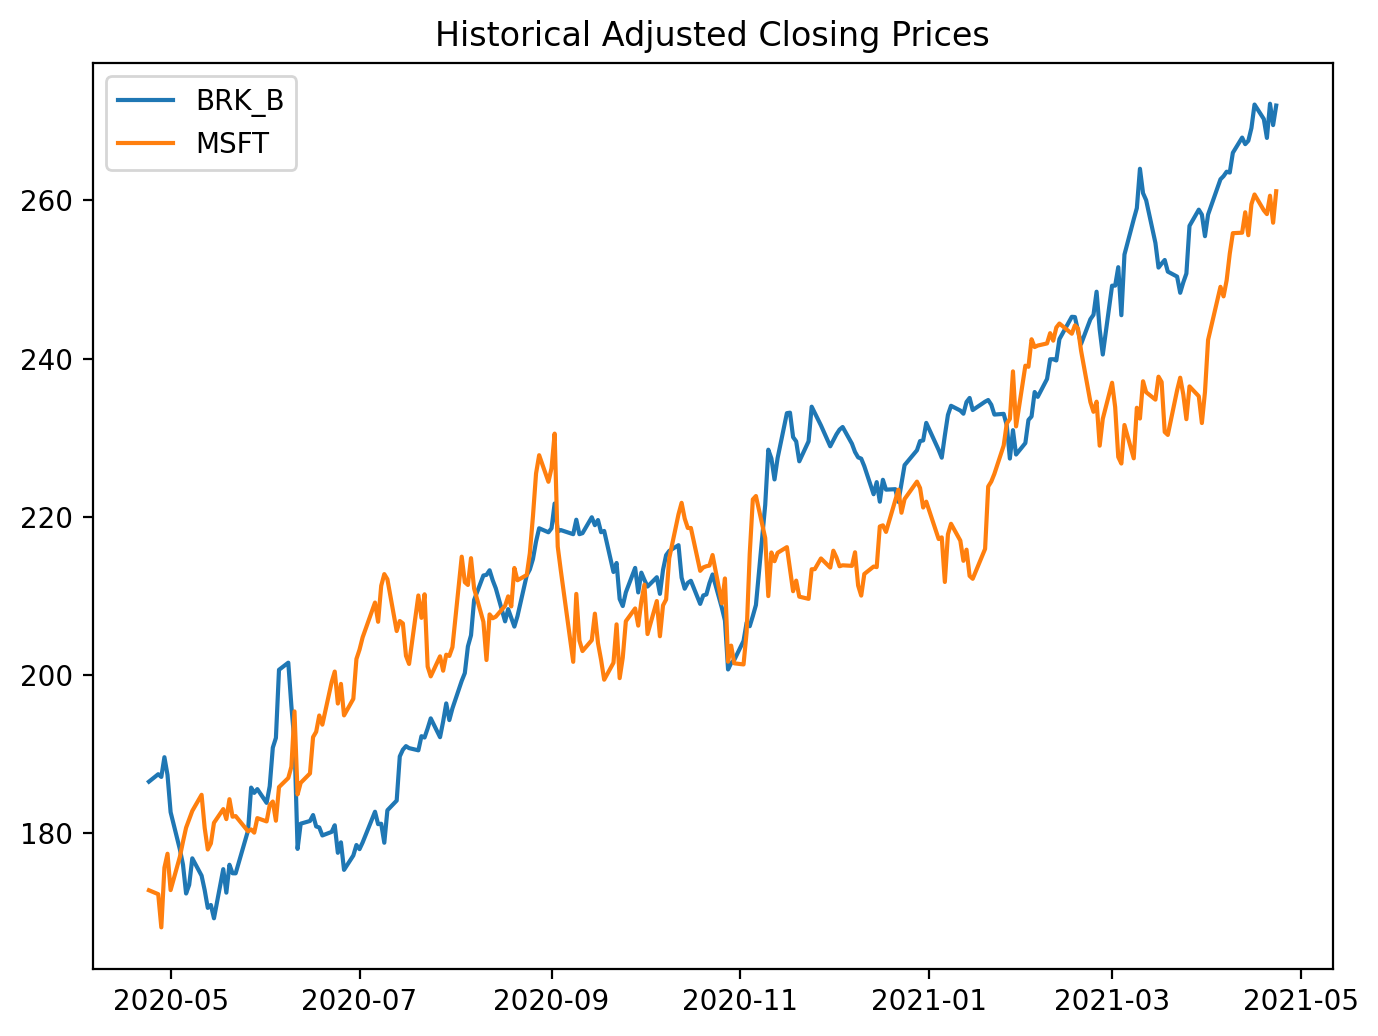

In [5]:
# Correlation of Nike and Apple ~ 0.89.
figure(figsize=(8, 6), dpi=200)
BRK_B = d['BRK-B']
MSFT = d['MSFT']
plt.plot(BRK_B, label = "BRK_B")
plt.plot(MSFT, label = "MSFT")
plt.title('Historical Adjusted Closing Prices')
plt.legend()
# More reasonable.

Text(0.5, 1.0, 'Spread between NIKE and AAPL')

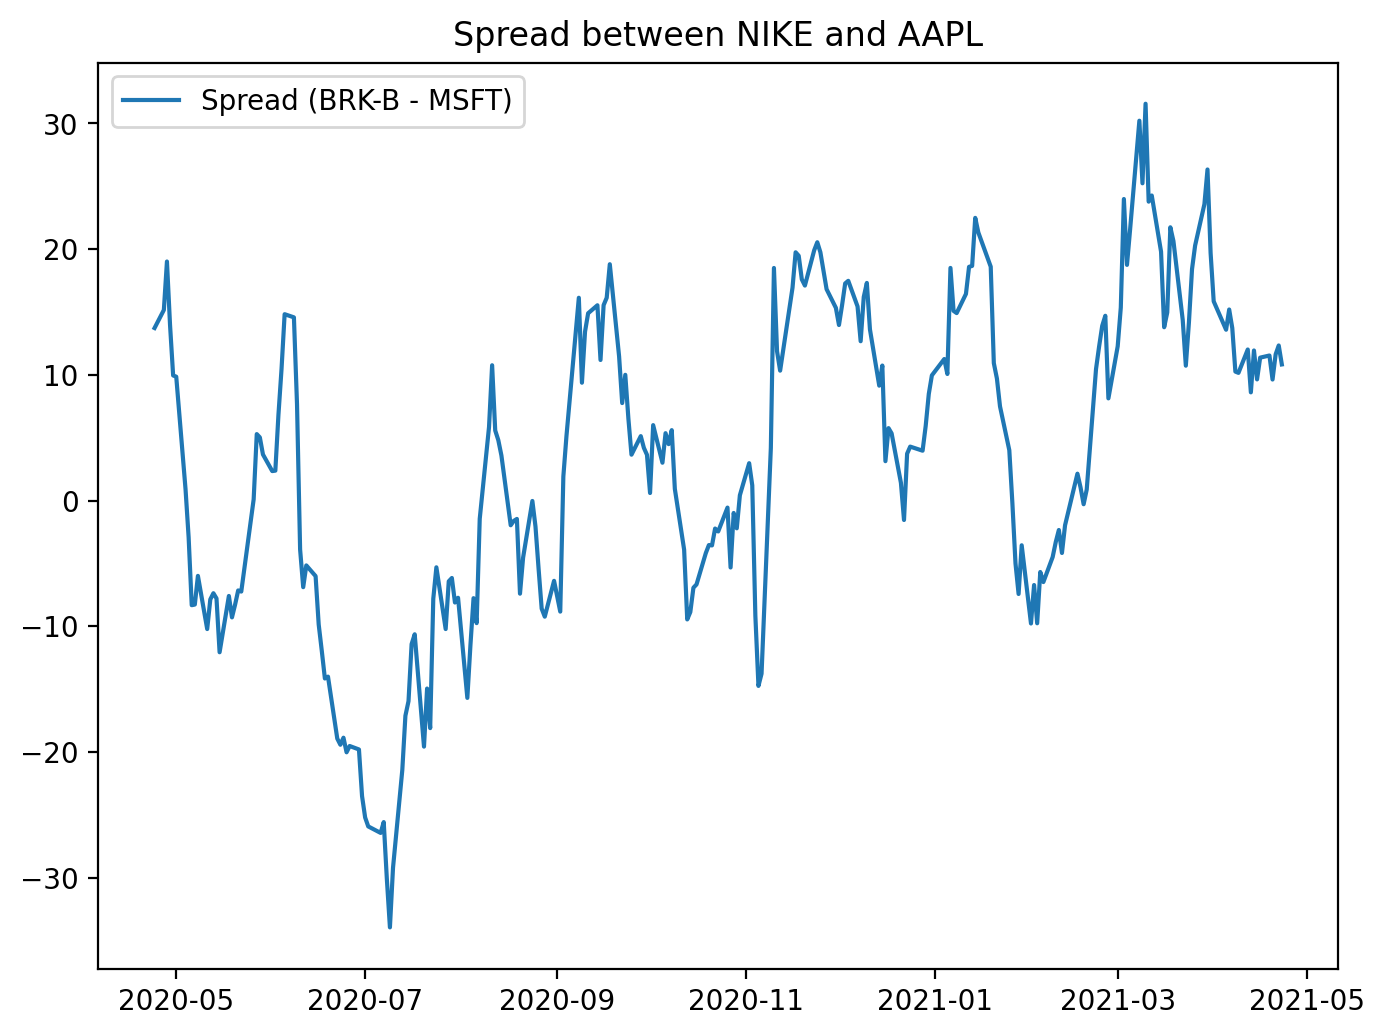

In [6]:
# plot the spread
figure(figsize=(8, 6), dpi=200)
plt.plot(BRK_B - MSFT, label = 'Spread (BRK-B - MSFT)')
plt.legend()
plt.title("Spread between NIKE and AAPL")

In [7]:
# Check out the cointegration value: Null hyp. = no cointegration
import statsmodels.tsa.stattools as ts 
result = ts.coint(BRK_B, MSFT)

In [8]:
# Cointegration test: A technique used to find a potential correlation in a time series (long term)
# Determines if the spread between the two assets are constant over time.
# Null Hypothesis: Spread between series are non-stationary.
# Uses the augmented Engle-Granger two-step cointegration test.
cointegration_t_statistic = result[0]
p_val = result[1]
critical_values_test_statistic_at_1_5_10 = result[2]
print('We want the P val < 0.05 (meaning that cointegration exists)')
print('P value for the augmented Engle-Granger two-step cointegration test is', p_val)

We want the P val < 0.05 (meaning that cointegration exists)
P value for the augmented Engle-Granger two-step cointegration test is 0.06483525312445777


In [9]:
from statsmodels.tsa.stattools import adfuller
# Compute the ADF test for Berkshire Hathaway and Microsoft
# With all time series, you want to have stationary data otherwise our data will be very hard to predict.
# ADF for Berkshire Hathaway Class B
BRK_B_ADF = adfuller(BRK_B)
print('P value for the Augmented Dickey-Fuller Test is', BRK_B_ADF[1])
MSFT_ADF = adfuller(MSFT)
print('P value for the Augmented Dickey-Fuller Test is', MSFT_ADF[1])
Spread_ADF = adfuller(BRK_B - MSFT)
print('P value for the Augmented Dickey-Fuller Test is', Spread_ADF[1])
Ratio_ADF = adfuller(BRK_B / MSFT)
print('P value for the Augmented Dickey-Fuller Test is', Ratio_ADF[1])
# Spread looks fine. If you'd want even better results, consider taking the difference (order 1) of Berkshire and MSFT

# Results: can only claim stationary for the spread (since P value < 0.05). This suggests a constant mean over time.
# Therefore, the two series are cointegrated.

P value for the Augmented Dickey-Fuller Test is 0.907870918791454
P value for the Augmented Dickey-Fuller Test is 0.7145867047510276
P value for the Augmented Dickey-Fuller Test is 0.04560159662437011
P value for the Augmented Dickey-Fuller Test is 0.032007878899577215


Text(0.5, 1.0, 'Price Ratio between BRK and MSFT')

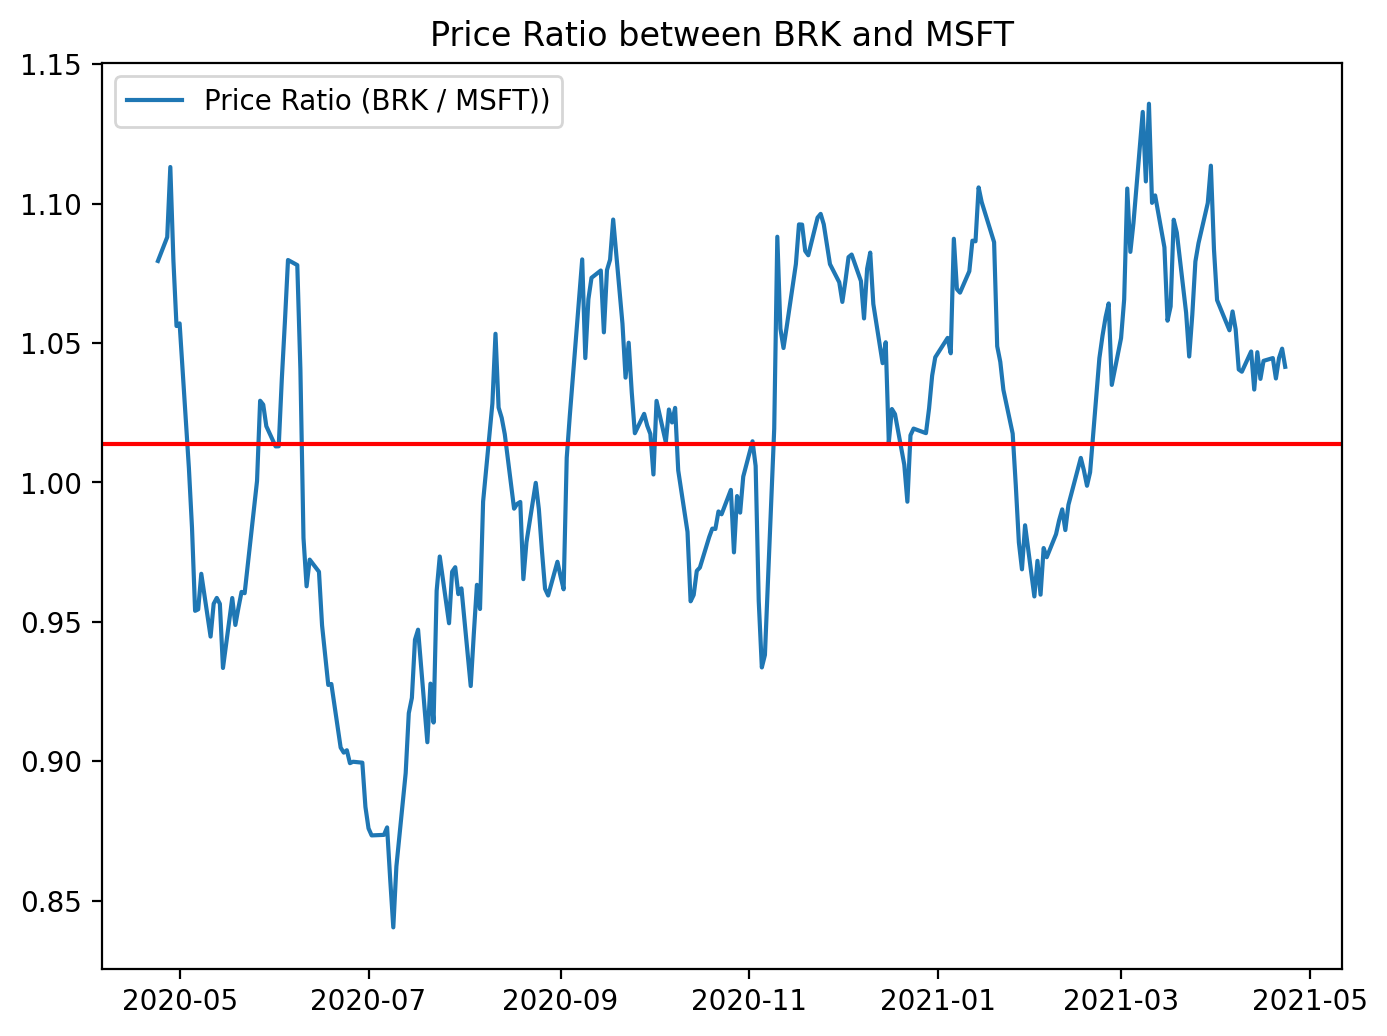

In [10]:
# Also, we can take a look at the price ratios between the two time series.
figure(figsize=(8, 6), dpi=200)
ratio = BRK_B / MSFT
plt.plot(ratio, label = 'Price Ratio (BRK / MSFT))')
plt.axhline(ratio.mean(), color='red')
plt.legend()
plt.title("Price Ratio between BRK and MSFT")

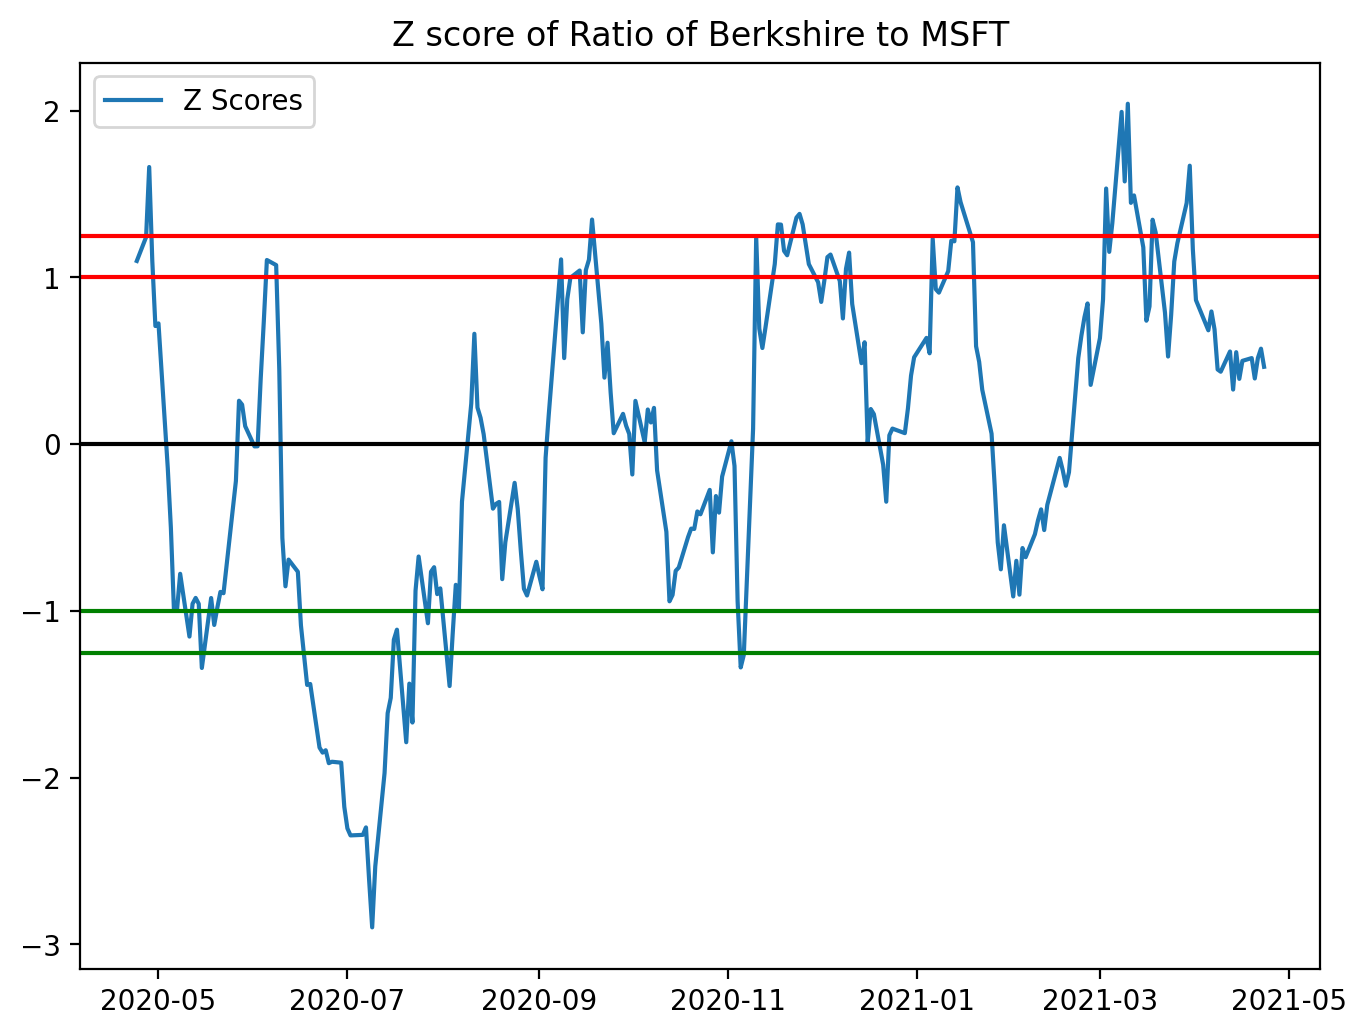

In [11]:
# NOTE, here you can either use the spread OR the Price ratio approach. Anyways, let's standardize the ratio so we can have a 
# upper and lower bound to help evaluate our trends.. Let's stick with the ratio data.
figure(figsize=(8, 6), dpi=200)
# Calculate the Zscores of each row.
df_zscore = (ratio - ratio.mean())/ratio.std()
plt.plot(df_zscore, label = "Z Scores")
plt.axhline(df_zscore.mean(), color = 'black')
plt.axhline(1.0, color='red') # Setting the upper and lower bounds to be the z score of 1 and -1 (1/-1 standard deviation)
plt.axhline(1.25, color='red') # 95% of our data will lie between these bounds.
plt.axhline(-1.0, color='green') # 68% of our data will lie between these bounds.
plt.axhline(-1.25, color='green') # 95% of our data will lie between these bounds.
plt.legend(loc = 'best')
plt.title('Z score of Ratio of Berkshire to MSFT')
plt.show()
# For the most part, the range that exists outside of these 'bands' must come converge back to the mean. Thus, you can 
# determine when you can go long or short the pair (BRK_B to MSFT).

In [ ]:
# That's cool.. so when do we actually start trading? We need some form of 'signal' to trade (and to trade)
# This is where it can become an 'artform' AND a probability game.

In [ ]:
# You could split 80 / 20 for train and test, BUT we are not going to be backtesting since we are just going over the model.
# train = ratio[0:round(0.8*len(ratio))]
# test = ratio[round(0.8*len(ratio)):]
# print('Do the splits check out?',len(train) + len(test) == len(ratio))

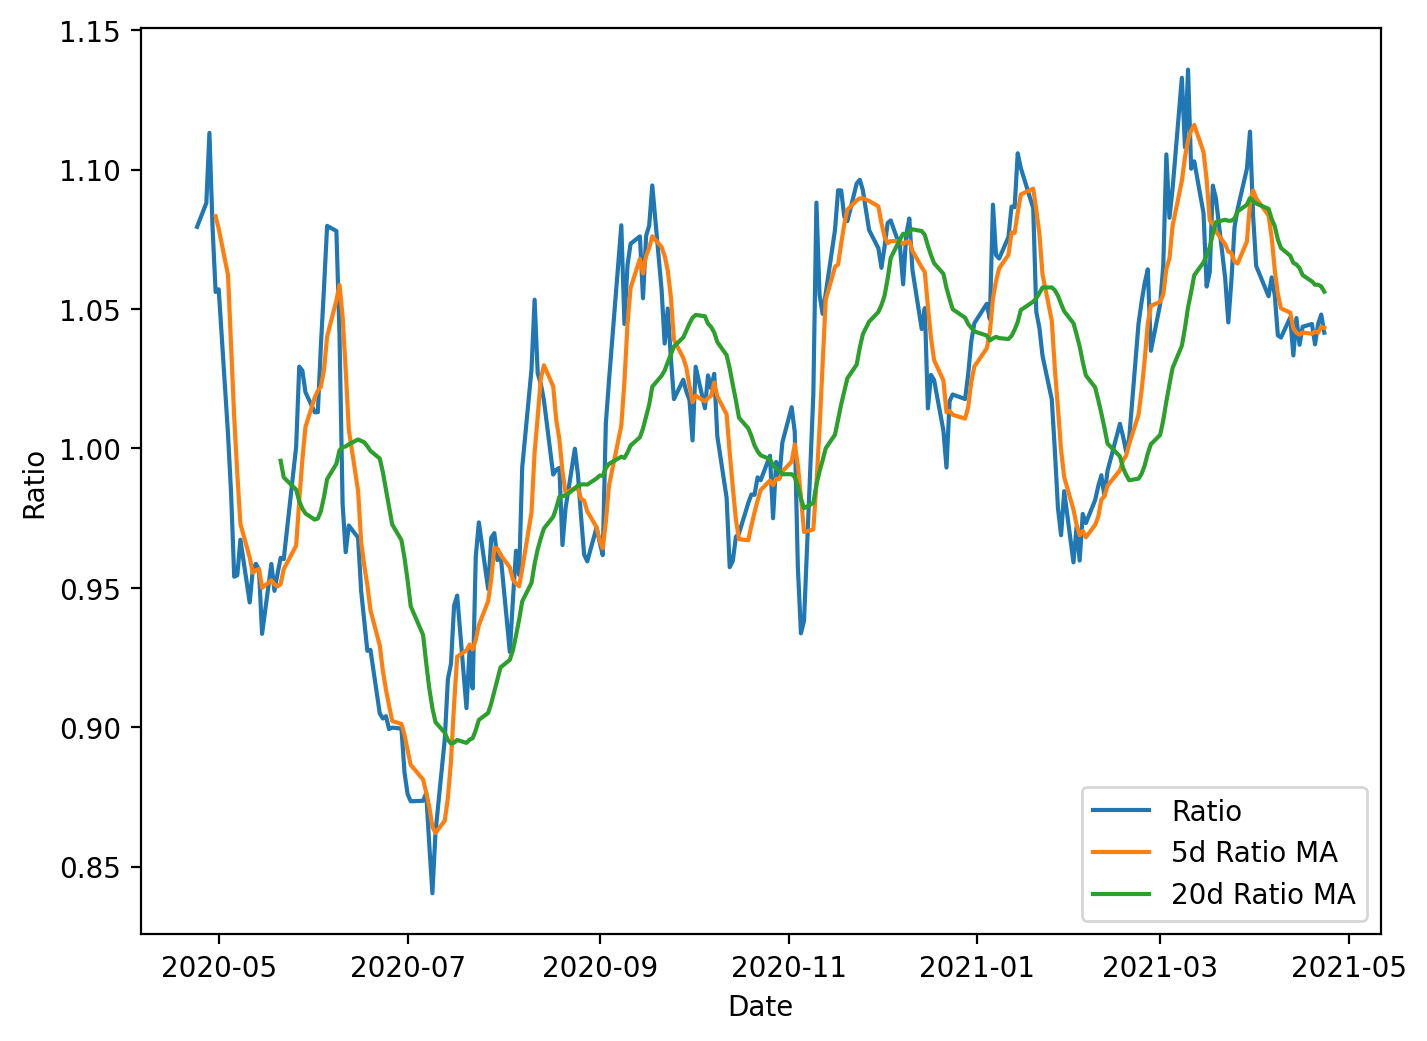

In [12]:
figure(figsize=(8, 6), dpi=200)
ratios_mavg5 = ratio.rolling(window=5, center=False).mean()
ratios_mavg20 = ratio.rolling(window=20, center=False).mean()
std_20 = ratio.rolling(window=20, center=False).std()
zscore_20_5 = (ratios_mavg5 - ratios_mavg20)/std_20
plt.plot(ratio.index, ratio.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg20.index, ratios_mavg20.values)
plt.legend(['Ratio', '5d Ratio MA', '20d Ratio MA'])
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.show()

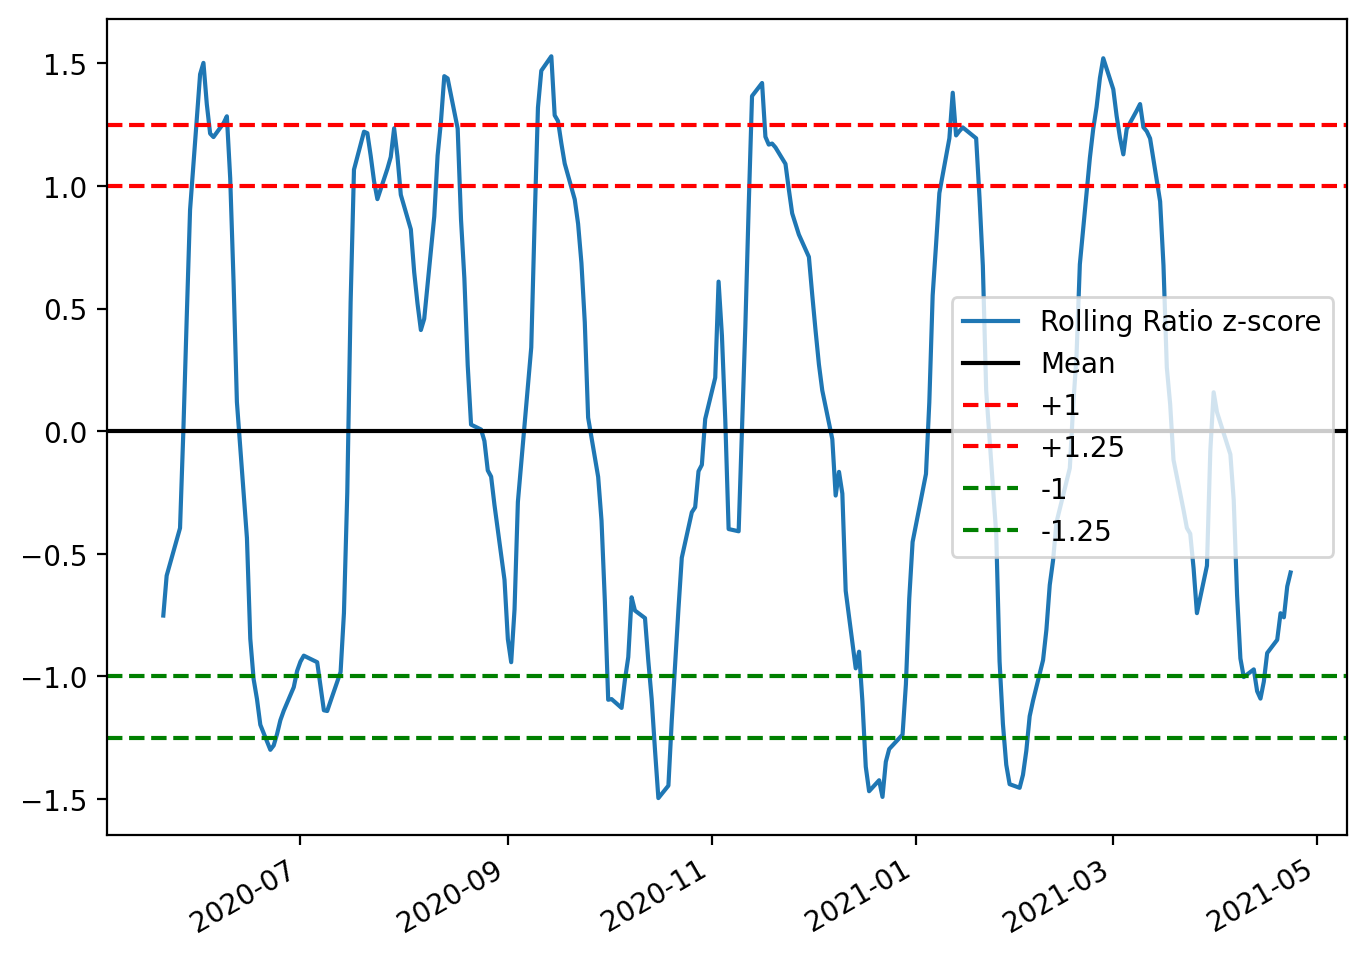

In [13]:
figure(figsize=(8, 6), dpi=200)
zscore_20_5.plot()
plt.axhline(0, color='black')
plt.axhline(1, color='red', linestyle='--')
plt.axhline(1.25, color='red', linestyle='--')
plt.axhline(-1, color='green', linestyle='--')
plt.axhline(-1.25, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-score', 'Mean', '+1','+1.25','-1','-1.25'])
plt.show()

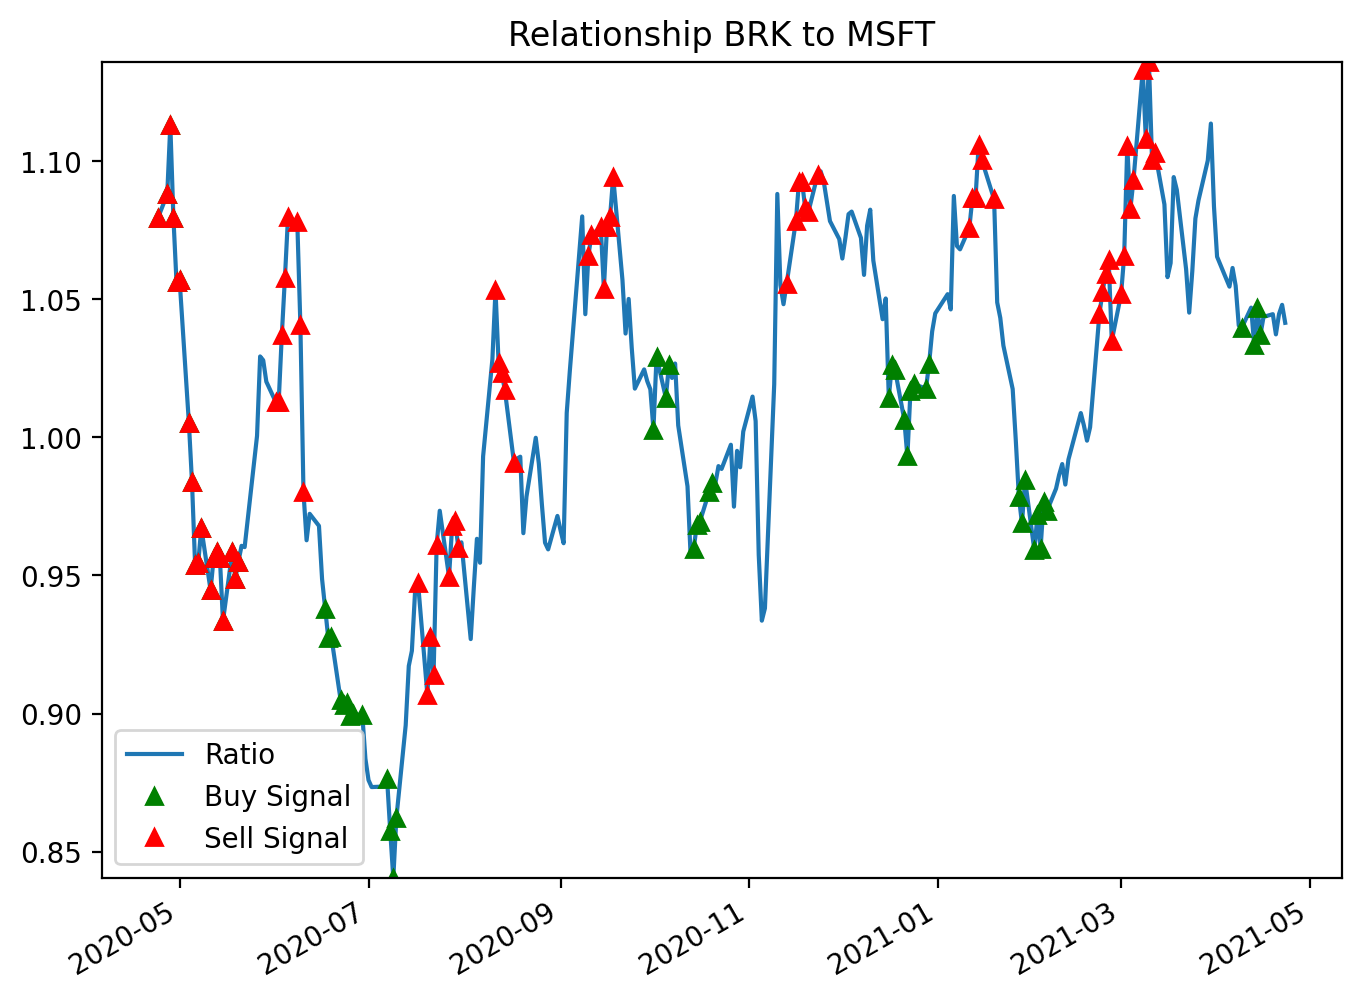

In [14]:
figure(figsize=(8, 6), dpi=200)
ratio.plot()
buy = ratio.copy()
sell = ratio.copy()
buy[zscore_20_5>-1] = 0
sell[zscore_20_5<1] = 0
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio.min(), ratio.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.title('Relationship BRK to MSFT')
plt.show()

# Momentum (Trends are your friends)

# Valuation (Buy low, sell high)

# Sentiment (Buy the rumor, sell the news)

# Seasonality (Sell in May and go away)